In [113]:
import os
from collections import OrderedDict
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import random
from torchsummary import summary
%matplotlib inline

In [100]:
# Load names
names = []
with open('names.txt') as f:
    names = f.readlines()
names = [ x.strip() for x in names]
names

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [101]:
# create mapping from letters to indices
letters = []
for name in names:
    letters.extend(list(name))
letters.extend('.')
letters = list(set(letters))
letters.sort()
mapping = dict(zip(letters, list(range(27))))
mapping

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [102]:
# split names into training, dev / validation and test
random.seed(42)
random.shuffle(names)
n1 = int(0.8 * len(names))
n2 = int(0.9 * len(names))
names_trn = names[0:n1]
names_dev = names[n1:n2]
names_tst = names[n2:]
print(f"Training {len(names_trn)} Dev/Validation {len(names_dev)} Testing {len(names_tst)}")

Training 25626 Dev/Validation 3203 Testing 3204


In [103]:
# create n-grams & datasets

context_size = 8

def create_ngrams(names_list, bucket_size=(context_size+1)):
    ngrams = []
    for name in names_list:
        temp_name = '.'*(bucket_size-1) + name + '.'
        name_ngrams = [ temp_name[i:i+bucket_size] for i in range(0, len(temp_name)-bucket_size+1) ]
        ngrams.extend(name_ngrams)
    return ngrams

def create_dataset_from_ngrams(ngrams):
    X_arr = [ [ mapping[c] for c in ngram[:-1] ] for ngram in ngrams ]
    Y_arr = [ mapping[ngram[-1]] for ngram in ngrams ]
    X = torch.tensor(X_arr)
    Y = torch.tensor(Y_arr)
    return (X, Y)

def create_dataset_from_names_list(names_list):
    ngrams = create_ngrams(names_list)
    return create_dataset_from_ngrams(ngrams)

X_trn, Y_trn = create_dataset_from_names_list(names_trn)
print(f"X_trn shape: {X_trn.shape}, Y_trn shape: {Y_trn.shape}")
X_dev, Y_dev = create_dataset_from_names_list(names_dev)
print(f"X_dev shape: {X_dev.shape}, Y_dev shape: {Y_dev.shape}")
X_tst, Y_tst = create_dataset_from_names_list(names_tst)
print(f"X_tst shape: {X_tst.shape}, Y_tst shape: {Y_tst.shape}")

X_trn shape: torch.Size([182625, 8]), Y_trn shape: torch.Size([182625])
X_dev shape: torch.Size([22655, 8]), Y_dev shape: torch.Size([22655])
X_tst shape: torch.Size([22866, 8]), Y_tst shape: torch.Size([22866])


In [178]:
vocab_size = 27
embedding_vec_size = 24
hidden_layer_size = 128
training_batch_size = 32

In [105]:
test = torch.randn((2, 8, 10))
mtest = nn.BatchNorm1d(80)
for name, p in mtest.named_parameters():
    print(f"{name} : {p.shape}")
print(mtest.running_mean.shape)
print(mtest.running_var.shape)
print(mtest.running_mean)
test1 = mtest(test.view(2, 80)).view(2, 8, 10)
print(test1.shape)

weight : torch.Size([80])
bias : torch.Size([80])
torch.Size([80])
torch.Size([80])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])
torch.Size([2, 8, 10])


In [129]:
input = torch.randint(vocab_size, (training_batch_size, context_size,))
print(f"input : {input.shape}")

m1 = nn.Embedding(vocab_size, embedding_vec_size)
o1 = m1(input)
print(f"o1 : {o1.shape}")

# Block 1: combine, linear, batchnorm, tanh
m2 = Reshape(-1, context_size // 2, embedding_vec_size * 2)
o2 = m2(o1)
print(f"o2 : {o2.shape}")
m3 = nn.Linear(embedding_vec_size * 2, hidden_layer_size)
o3 = m3(o2)
print(f"o3 : {o3.shape}")
m3_5 = SwapAxes(1, 2)
o3_5 = m3_5(o3)
print(f"o3_5 : {o3_5.shape}")
m4 = nn.BatchNorm1d(hidden_layer_size)
for name, p in m4.named_parameters():
    print(f"{name} : {p.shape}")
print(m4.running_mean.shape)
print(m4.running_var.shape)
o4 = m4(o3_5)
print(f"o4 : {o4.shape}")
m4_5 = SwapAxes(1, 2)
o4_5 = m4_5(o4)
print(f"o4_5 : {o4_5.shape}")
m5 = nn.Tanh()
o5 = m5(o4_5)
print(f"o5 : {o5.shape}")

# Block 2: combine, linear, batchnorm, tanh

# Block 3: combine, linear, batchnorm, tanh


# Output logits: linear only



input : torch.Size([32, 8])
o1 : torch.Size([32, 8, 10])
o2 : torch.Size([32, 4, 20])
o3 : torch.Size([32, 4, 200])
o3_5 : torch.Size([32, 200, 4])
weight : torch.Size([200])
bias : torch.Size([200])
torch.Size([200])
torch.Size([200])
o4 : torch.Size([32, 200, 4])
o4_5 : torch.Size([32, 4, 200])
o5 : torch.Size([32, 4, 200])


In [126]:
x = torch.randn((2, 3, 4))
print(x.shape)
m = SwapAxes(1, 2)
y = m(x)
y.shape

torch.Size([2, 3, 4])
(1, 2)


torch.Size([2, 4, 3])

In [159]:
input = torch.randint(vocab_size, (training_batch_size, context_size,))
print(f"input : {input.shape}")
output = model(input)
print(output.shape)

input : torch.Size([32, 8])
torch.Size([32, 27])


In [185]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super(Reshape, self).__init__()
        self.shape = args
        
    def forward(self, x):
        return torch.reshape(x, self.shape)
    
class SwapAxes(nn.Module):
    def __init__(self, *args):
        super(SwapAxes, self).__init__()
        self.axes_to_swap = args
    
    def forward(self, x):
        return torch.swapaxes(x, self.axes_to_swap[0], self.axes_to_swap[1])

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            ('embed', nn.Embedding(vocab_size, embedding_vec_size)),
            
            # Block 1: Combine, linear, batchnorm, tanh
            ('B1_combine', Reshape(-1, context_size // 2, embedding_vec_size * 2)),
            ('B1_linear', nn.Linear(embedding_vec_size * 2, hidden_layer_size, bias=False)),
            ('B1_swap_pre_BN', SwapAxes(1, 2)),
            ('B1_batchnorm', nn.BatchNorm1d(hidden_layer_size, momentum=0.001)),
            ('B1_swap_post_BN', SwapAxes(1, 2)),
            ('B1_tanh', nn.Tanh()),
            
            # Block 2: Combine, linear, batchnorm, tanh
            ('B2_combine', Reshape(-1, context_size // 4, hidden_layer_size * 2)),
            ('B2_linear', nn.Linear(hidden_layer_size * 2, hidden_layer_size, bias=False)),
            ('B2_swap_pre_BN', SwapAxes(1, 2)),
            ('B2_batchnorm', nn.BatchNorm1d(hidden_layer_size, momentum=0.001)),
            ('B2_swap_post_BN', SwapAxes(1, 2)),
            ('B2_tanh', nn.Tanh()),
            
            # Block 3: Combine, linear, batchnorm, tanh
            ('B3_combine', Reshape(-1, context_size // 8, hidden_layer_size * 2)),
            ('B3_linear', nn.Linear(hidden_layer_size * 2, hidden_layer_size, bias=False)),
            ('B3_swap_pre_BN', SwapAxes(1, 2)),
            ('B3_batchnorm', nn.BatchNorm1d(hidden_layer_size, momentum=0.001)),
            ('B3_swap_post_BN', SwapAxes(1, 2)),
            ('B3_tanh', nn.Tanh()),
            
            # Reshape and get rid of useless 2nd dim of size 1
            ('Discard_dim', Reshape(-1, hidden_layer_size)),
            
            # Output: Linear only
            ('Output_linear', nn.Linear(hidden_layer_size, vocab_size))
        ]))
    
    def forward(self, x):
        logits = self.model(x)
        return logits
    
model = NeuralNetwork()
# summary(model, torch.randint(vocab_size, (training_batch_size, context_size,)))

In [165]:
# optimizer = torch.optim.SGD(
#     model.parameters(), lr=0.1
# )

In [186]:
for name, p in model.named_parameters():
    print(f"{name} : {p.numel()}")

total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad
)
print(f"Total trainable params: {total_trainable_params}")

model.embed.weight : 648
model.B1_linear.weight : 6144
model.B1_batchnorm.weight : 128
model.B1_batchnorm.bias : 128
model.B2_linear.weight : 32768
model.B2_batchnorm.weight : 128
model.B2_batchnorm.bias : 128
model.B3_linear.weight : 32768
model.B3_batchnorm.weight : 128
model.B3_batchnorm.bias : 128
model.Output_linear.weight : 3456
model.Output_linear.bias : 27
Total trainable params: 76579


In [187]:
# parameter init: make last layer less confident
with torch.no_grad():
    model.model.Output_linear.weight *= 0.1
    model.model.Output_linear.bias *= 0.1

In [188]:
max_steps = 200000
lossi = []

for i in range(max_steps):
    # get training batch
    batch_idxs = torch.randint(0, X_trn.shape[0], (training_batch_size,))
    X_batch = X_trn[batch_idxs]
    Y_batch = Y_trn[batch_idxs]
    
    # forward pass
    logits = model(X_batch)

    # negative log loss
    loss = F.cross_entropy(logits, Y_batch)

    # backprop
    for p in model.parameters():
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 150000 else 0.01
    for p in model.parameters():
        p.data += -lr * p.grad
        
    # track stats
    if i % 10000 == 0: # print every once in a while
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())


      0/ 200000: 3.2985
  10000/ 200000: 2.5190
  20000/ 200000: 2.0294
  30000/ 200000: 1.9122
  40000/ 200000: 1.7474
  50000/ 200000: 2.2126
  60000/ 200000: 2.2427
  70000/ 200000: 2.1544
  80000/ 200000: 2.0280
  90000/ 200000: 1.5487
 100000/ 200000: 2.1310
 110000/ 200000: 1.8363
 120000/ 200000: 2.0729
 130000/ 200000: 2.6265
 140000/ 200000: 2.1090
 150000/ 200000: 1.7552
 160000/ 200000: 1.7233
 170000/ 200000: 1.8156
 180000/ 200000: 2.2073
 190000/ 200000: 1.7131


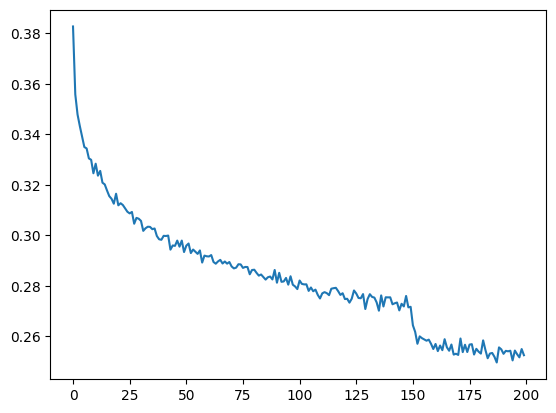

In [189]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

In [190]:
model.eval()

NeuralNetwork(
  (model): Sequential(
    (embed): Embedding(27, 24)
    (B1_combine): Reshape()
    (B1_linear): Linear(in_features=48, out_features=128, bias=False)
    (B1_swap_pre_BN): SwapAxes()
    (B1_batchnorm): BatchNorm1d(128, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (B1_swap_post_BN): SwapAxes()
    (B1_tanh): Tanh()
    (B2_combine): Reshape()
    (B2_linear): Linear(in_features=256, out_features=128, bias=False)
    (B2_swap_pre_BN): SwapAxes()
    (B2_batchnorm): BatchNorm1d(128, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (B2_swap_post_BN): SwapAxes()
    (B2_tanh): Tanh()
    (B3_combine): Reshape()
    (B3_linear): Linear(in_features=256, out_features=128, bias=False)
    (B3_swap_pre_BN): SwapAxes()
    (B3_batchnorm): BatchNorm1d(128, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (B3_swap_post_BN): SwapAxes()
    (B3_tanh): Tanh()
    (Discard_dim): Reshape()
    (Output_linear): Linear(in

In [191]:
# Calculate loss on all training data
logits = model(X_trn)
loss = F.cross_entropy(logits, Y_trn)
loss.item()

1.7703425884246826

In [174]:
# Calculate loss on all dev data
logits = model(X_dev)
loss = F.cross_entropy(logits, Y_dev)
loss.item()

2.02144455909729

In [175]:
# Calculate loss on all test data
logits = model(X_tst)
loss = F.cross_entropy(logits, Y_tst)
loss.item()

2.023040294647217

In [176]:
# Sample from the model
for i in range(10):
    x_idxs = [0] * context_size
    char_idxs = [ 0, ]
    while True:
        # forward pass
        x = torch.tensor([x_idxs])
        logits = model(x)
        
        # create output prob dist
        probs = F.softmax(logits, dim=1)
        
        # sample from output prob dist
        next_char = torch.multinomial(probs[0, :], 1, replacement=True).item()
        char_idxs.append(next_char)
        if next_char == 0:
            break
            
        # update input for next iter with next_char
        x_idxs.append(next_char)
        x_idxs = x_idxs[1:]
        
    name_pred = ''.join([letters[idx] for idx in char_idxs])
    print(name_pred)


.sauvis.
.jenis.
.domonii.
.jahmiah.
.domir.
.anel.
.laro.
.kirostin.
.emandro.
.clard.
